<a href="https://colab.research.google.com/github/mobarakol/computer_vision_tutorial/blob/main/Stereo_Camera_Calibration_Triangulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
url = 'https://drive.google.com/uc?id=1o6OVbxi6dT0kDinmUQaBrEZBF3vz_kDp'
gdown.download(url,'frames.zip',quiet=True)
!unzip -q frames.zip

Calibrating Single View Cameras and detecting the checkerboard patterns

True
True
True
True


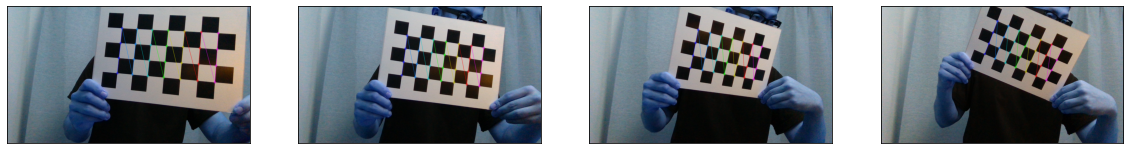

In [14]:
import cv2 as cv
import glob
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

 
images_folder = 'D2/*.png'
images_names = sorted(glob.glob(images_folder))
images = []
for imname in images_names:
    im = cv.imread(imname, 1)
    images.append(im) 

#detect the checkerboard patterns
#criteria used by checkerboard pattern detector.
#Change this if the code can't find the checkerboard
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
rows = 5-1 #number of checkerboard rows.
columns = 8-1 #number of checkerboard columns.
world_scaling = 1. #change this to the real world square size. Or not.
 
#coordinates of squares in the checkerboard world space
objp = np.zeros((rows*columns,3), np.float32)
objp[:,:2] = np.mgrid[0:rows,0:columns].T.reshape(-1,2)
objp = world_scaling* objp
 
 
#frame dimensions. Frames should be the same size.
width = images[0].shape[1]
height = images[0].shape[0]
 
#Pixel coordinates of checkerboards
imgpoints = [] # 2d points in image plane.
 
#coordinates of the checkerboard in checkerboard world space.
objpoints = [] # 3d point in real world space
 
num_img = 4
fig, ax = plt.subplots(1, num_img, figsize=(5*num_img,5), subplot_kw=dict(xticks=[],yticks=[]))

for idx, frame in enumerate(images):
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 
    #find the checkerboard
    ret, corners = cv.findChessboardCorners(gray, (rows, columns), None)
    print(ret)
    if ret == True:
 
        #Convolution size used to improve corner detection. Don't make this too large.
        conv_size = (11, 11)
 
        #opencv can attempt to improve the checkerboard coordinates
        corners = cv.cornerSubPix(gray, corners, conv_size, (-1, -1), criteria)
        cv.drawChessboardCorners(frame, (rows,columns), corners, ret)
        ax[idx].imshow(frame)
 
        objpoints.append(objp)
        imgpoints.append(corners)

In [6]:
images_names

['D2/camera0_0.png',
 'D2/camera0_1.png',
 'D2/camera0_2.png',
 'D2/camera0_3.png']

In [8]:
len(images)

4